# Project: Wrangling and Analyze Data

<span style="color: blue;">

### Notebook setup

I'm importing here the necessary libraries to complete the project.
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

<span style="color: blue;">
    In order to simplify, I will be naming the different dataframes as follows:

- df1 = original df from the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
- df2 = first df from the tweet image prediction
- df3 = original tweepy additional data

    In the cleaning step, I will create a copy of each of them and add "_clean" to the name.
</span>

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
response = requests.get(url)
response

<Response [200]>

<span style="color: blue;">
I just made sure the response was successful before proceeding.
    
In the next step, I will be saving the file in the same folder as the project notebook, so I won't need to specify a folder name.
</span>

In [4]:
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

<span style="color: purple;">
In the previous line, I had to modify the api for the code not to give and error when the max number of requests was reached. To do that I used this source:
    
https://knowledge.udacity.com/questions/746417

<span style="color: blue;">    
First, I will create a list with all the ids, from the first column in df1.
    
I looked at this source for obtaining a list from a pandas column:
    
https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column-or-row
</span>


In [7]:
tweet_ids = df1['tweet_id'].tolist()

<span style="color: blue;">
I looked at this source for understanding how to use try-except:
    
https://knowledge.udacity.com/questions/16410
    
And this one for adding the ._json extension so that dump function works properly:

https://knowledge.udacity.com/questions/691156
</span>

In [8]:
exceptions = []
with open('json_data.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            json.dump(tweet, outfile)
            outfile.write('\n')
        except Exception as e:
            exceptions.append(id)

Rate limit reached. Sleeping for: 44
Rate limit reached. Sleeping for: 591
Rate limit reached. Sleeping for: 590


<span style="color: blue;">
For the next part, I had to look at this source to know how to read the necessary information from each line of text (as a status object):

https://knowledge.udacity.com/questions/164578

</span>

In [9]:
tweet_id = []
retweet_count = []
favorite_count = []
with open('json_data.txt') as file:
    for line in file:
        status  = json.loads(line)
        tweet_id.append(status['id_str'])
        retweet_count.append(status['retweet_count'])
        favorite_count.append(status['favorite_count'])
df3 = pd.DataFrame(
    {'tweet_id': tweet_id,
     'retweet_count': retweet_count,
     'favorite_count': favorite_count})
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7099,34218
1,892177421306343426,5350,29671
2,891815181378084864,3520,22341
3,891689557279858688,7302,37383
4,891327558926688256,7841,35736


<span style="color: purple;">

I had to review the code above because my json file was incomplete, so I'll make sure I have all the rows this time:

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


<span style="color: purple;">
The reviewer said I should be getting 2357 entries, and I'm only getting 2327. It's already much better than before (when I only had around 800). I will assume the 30 missing entries belong to deleted tweets.

<span style="color: blue;">
I sometimes restart the notebook and re-run all the code to make sure everything is fine. However, I'd like to avoid rewriting the json_data file again as it takes a long time. Now that I've made sure the code runs properly up to here, I'll write the 3 dataframes into separate csv files so that I can use them as a checkpoint in case I need to restart the notebook.
These files can also be used for the visual assessment in the next section by opening them in Excel or another program.

I don't know if this is a good thing to do, I see it more as a backup copy to avoid losing it all now that it's working. For this to make sense I guess I should start on a new notebook from this point, but I won't do that as the project is to be fully submitted in a single notebook. Please provide a solution for this kind of problem if there's one commonly used. Thanks.

</span>

In [15]:
df1.to_csv('df1.csv', index=False)
df2.to_csv('df2.csv', index=False)
df3.to_csv('df3.csv', index=False)

In [16]:
df1 = pd.read_csv('df1.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
df2 = pd.read_csv('df2.csv')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
df3 = pd.read_csv('df3.csv')
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7099,34218
1,892177421306343426,5350,29671
2,891815181378084864,3520,22341
3,891689557279858688,7302,37383
4,891327558926688256,7841,35736


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



<span style="color: blue;">
    
### Visual Assessment

I will start by looking at the 3 dataframes directly in the notebook and then I will also open them in Excel to perform the visual assessment.

</span>

In [19]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [20]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7099,34218
1,892177421306343426,5350,29671
2,891815181378084864,3520,22341
3,891689557279858688,7302,37383
4,891327558926688256,7841,35736
...,...,...,...
2322,666049248165822465,37,91
2323,666044226329800704,117,251
2324,666033412701032449,36,101
2325,666029285002620928,39,115


<span style="color: blue;">

### Programatic Assessment

I will now look at the 3 dataframes using some pandas functions to dig deeper into them.
    
First, I will use the .info function to look at the different data types and non-null counts for each column.

</span>

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [25]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<span style="color: blue;">

I will now use the nunique and value_counts function on several columns to make sure there are no repeated or incorrect values.

In [26]:
df1.tweet_id.nunique()

2356

<span style="color: blue;">
No tweets in df1 seem to be repeated as each of them has a different id.

In [28]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

<span style="color: blue;">
We see here, as observed in the visual assessment previously, that most of the values are in the range between 4 and 14. The rest, or at least those above 20, seem to be wrong.

In [29]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

<span style="color: blue;">
The rating denominator should be 10 for all the tweets, which is not the case.

In [30]:
df1.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
              ... 
Bobble           1
Shakespeare      1
Gabby            1
Scruffers        1
Mack             1
Name: name, Length: 957, dtype: int64

<span style="color: blue;">
745 dogs don't have a name ("None"), and 55 of them are named "a".

In [31]:
df1.loc[(df1['doggo'] == "None") & (df1['floofer'] == "None") & (df1['pupper'] == "None") & (df1['puppo'] == "None")].tweet_id.count()

1976

<span style="color: blue;">
Out of the 2356 entries, 1976 have no value for any of the dog stage columns. That leaves 380 rows with some value in at least one of the stages.

For the next line, I used this source:

https://www.kite.com/python/answers/how-to-select-rows-by-multiple-label-conditions-with-pandas-loc-in-python

In [32]:
df1.query('doggo != "None"').tweet_id.count() + df1.query('floofer != "None"').tweet_id.count() + df1.query('pupper != "None"').tweet_id.count() + df1.query('puppo != "None"').tweet_id.count()

394

<span style="color: blue;">
However, we see there are 394 cells with a stage value, meaning that up to 14 of them could have two stages assigned.

In [33]:
df1.timestamp.sort_values()

2355    2015-11-15 22:32:08 +0000
2354    2015-11-15 23:05:30 +0000
2353    2015-11-15 23:21:54 +0000
2352    2015-11-16 00:04:52 +0000
2351    2015-11-16 00:24:50 +0000
                  ...            
4       2017-07-29 16:00:24 +0000
3       2017-07-30 15:58:51 +0000
2       2017-07-31 00:18:03 +0000
1       2017-08-01 00:17:27 +0000
0       2017-08-01 16:23:56 +0000
Name: timestamp, Length: 2356, dtype: object

In [34]:
df2.tweet_id.nunique()

2075

In [35]:
df2.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
three-toed_sloth        1
trombone                1
loupe                   1
espresso                1
sliding_door            1
Name: p1, Length: 378, dtype: int64

<span style="color: blue;">
Some dog breeds are uppercase and others are lowercase

In [36]:
df2.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
komondor                1
wallaby                 1
basketball              1
turnstile               1
apron                   1
Name: p2, Length: 405, dtype: int64

In [37]:
df2.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
golfcart               1
soap_dispenser         1
park_bench             1
rock_crab              1
traffic_light          1
Name: p3, Length: 408, dtype: int64

In [38]:
df2.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
          ...   
1372    0.999953
149     0.999956
1229    0.999962
1299    0.999984
106     1.000000
Name: p1_conf, Length: 2075, dtype: float64

In [39]:
df2.p2_conf.sort_values()

106     1.011300e-08
1299    1.002880e-05
1229    1.448950e-05
230     1.763430e-05
1372    2.335910e-05
            ...     
72      4.549370e-01
232     4.605650e-01
1514    4.648160e-01
1756    4.676780e-01
986     4.880140e-01
Name: p2_conf, Length: 2075, dtype: float64

In [40]:
df2.p3_conf.sort_values()

106     1.740170e-10
149     2.160900e-07
1906    5.595040e-07
1760    8.832830e-07
1299    1.434470e-06
            ...     
1613    2.476190e-01
123     2.551820e-01
97      2.706730e-01
1080    2.710420e-01
1071    2.734190e-01
Name: p3_conf, Length: 2075, dtype: float64

<span style="color: blue;">
Nothing seems to be wrong with the prediction columns.

In [41]:
df2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [42]:
df2.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [43]:
df2.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

<span style="color: blue;">
Nothing wrong with prediction accuracy columns either.

In [44]:
df3.tweet_id.nunique()

2327

In [45]:
df3.favorite_count.value_counts()

0       160
435       3
1001      3
874       3
850       3
       ... 
8049      1
3435      1
9578      1
1233      1
2045      1
Name: favorite_count, Length: 1986, dtype: int64

In [46]:
df3.retweet_count.value_counts()

81       5
476      5
320      5
5165     5
208      5
        ..
872      1
1490     1
1488     1
1484     1
14333    1
Name: retweet_count, Length: 1666, dtype: int64

In [47]:
df3.retweet_count.sort_values()

277         1
1267        2
260         2
326         2
29          3
        ...  
65      37923
395     40493
515     52395
1051    53592
1011    71705
Name: retweet_count, Length: 2327, dtype: int64

<span style="color: blue;">
As observed in the visual assessment, many tweets have 0 favorite count, whereas none of them have a 0 retweet_count. Something to look at.

<span style="color: blue;">
    
From the following lists, Quality issues 1-6 and 13 and Tidiness issues 1-2 have been identified under visual assessment, and the rest under programatic assessment.

</span>

### Quality issues
1. df1: Several dogs have the name "a" which seems to not be a proper name for a dog.

2. df1: A few dogs have "None" as a name, which seems to indicate a correct name is missing.

3. df1: Several dogs have a very high rating_numerator (+100), which seem to be out of the actual scoring range.

4. df1: Some dogs have two "stages".

5. df1: Some dogs have a rating_denominator different than 10.

6. df3: Many tweets have a favorite_count of 0 while having a high number of retweets, which seems unusual.

7. df1: timestamp and retweeted_status_timestamp are strings when they should be datetime.

8. df1: Some id columns are float type and some are integers.

9. df1: Missing values for expanded_urls

10. df2: Missing images for some tweets. Only 2075 rows in df2, whereas df1 has 2356 rows.

11. df2: Dog breeds using uppercase and lowercase strings.

12. df2: Non dog-breed predictions could be replaced by a single value to group all the wrong predictions.

13. df1: Some tweets aren't original. The columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id have values only for reply tweets and retweets, so these columns could be used to quickly identify non-original tweets.

### Tidiness issues

1. df1: The dog "stage" is separated into four different columns, each of them for a different category, while they could be combined in a single column.

2. All three dataframes contain related information and could be merged into a single dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [49]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

<span style="color: blue;">
I will first address the last quality issue to make sure all tweets are original. This requires removing rows, and this will simplify the cleaning in the next steps as it will focus only on the remaining rows.

### Issue #1: Quality Issue #13: df1 - Some tweets aren't original.

#### Define:
Remove all the rows from df1_clean not containing original tweets. To do so, remove all rows having a value on any of the reply/retweet status columns. After that, remove these columns as they'll be empty and useless.

For the following code I used these two sources:

https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

https://stackoverflow.com/questions/24511200/index-of-non-nan-values-in-pandas

#### Code

In [50]:
df1_clean = df1_clean.drop(df1_clean[(df1_clean.retweeted_status_id.notnull())].index)
df1_clean = df1_clean.drop(df1_clean[(df1_clean.in_reply_to_status_id.notnull())].index)

#### Test

In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

<span style="color: blue;">
We can see there are no non-null values on any of the retweet or reply columns, so we can proceed to delete them.

In [52]:
df1_clean = df1_clean.drop(df1_clean.columns[[1, 2, 6, 7, 8]], axis=1)

In [53]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


<span style="color: blue;">
The columns have been deleted.

### Issues #2 and #3: Tidiness issue 1: df1 - Dog stage variable separated in four different columns - Quality issue 4, some dogs having more than 1 stage.

I should start with completeness issues, but since solving them will require merging dataframes, I think it's better to start with this one so that the melting function for df1 doesn't become too complicated. Also, since quality issue 4 is also related to dog stages, I will solve this one first so that the melting doesn't provide unexpected results.

#### Define:

Identify the rows containing more than one dog stage assigned. Check the tweet text for those rows and manually remove the wrong stage for each of these rows so that only one stage remains. Then melt the four columns into a single one named "stage", with dtype categorical.

<span style="color: blue;">

I used the following sources:

For finding index of rows matching a condition:
https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value

For resetting index values, as they were not matching row numbers and the query wasn't working:
https://stackoverflow.com/questions/52162901/how-to-get-pandas-row-number-when-index-is-not-like-auto-increment/66038053

For filling with NaN:
https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe


#### Code

In [54]:
df1_clean.loc[df1_clean['doggo'] == "None", 'doggo'] = 0
df1_clean.loc[df1_clean['doggo'] == "doggo", 'doggo'] = 1

df1_clean.loc[df1_clean['floofer'] == "None", 'floofer'] = 0
df1_clean.loc[df1_clean['floofer'] == "floofer", 'floofer'] = 1

df1_clean.loc[df1_clean['pupper'] == "None", 'pupper'] = 0
df1_clean.loc[df1_clean['pupper'] == "pupper", 'pupper'] = 1

df1_clean.loc[df1_clean['puppo'] == "None", 'puppo'] = 0
df1_clean.loc[df1_clean['puppo'] == "puppo", 'puppo'] = 1
df1_clean['stage_sum'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']
df1_clean.stage_sum.value_counts()

0    1761
1     325
2      11
Name: stage_sum, dtype: int64

In [55]:
df1_clean = df1_clean.reset_index(drop=True)
stage_list = df1_clean.query('stage_sum == 2').index.tolist()
df1_clean.iloc[ stage_list, [3,8,9,10,11] ]

,text,doggo,floofer,pupper,puppo
154,Here's a puppo participating in the #ScienceMa...,1,0,0,1
161,"At first I thought this was a shy doggo, but i...",1,1,0,0
358,"This is Dido. She's playing the lead role in ""...",1,0,1,0
416,Here we have Burke (pupper) and Dexter (doggo)...,1,0,1,0
446,This is Bones. He's being haunted by another d...,1,0,1,0
536,This is Pinot. He's a sophisticated doggo. You...,1,0,1,0
562,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",1,0,1,0
689,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",1,0,1,0
748,Please stop sending it pictures that don't eve...,1,0,1,0
848,This is just downright precious af. 12/10 for ...,1,0,1,0


<span style="color: blue;">
By looking at these rows in the excel so that I can read the entire tweet, I verified the correct stage for these dogs. Some of them though are actually two dogs, and I will delete these rows because for the purpose of this study I only need single dogs.

NOTE: I'm not sure doing this manually was appropriate, but i couldn't think of a better way other than just removing all these rows from the dataset.

In [56]:
df1_clean.loc[ 154, ['doggo']] = 0
df1_clean.loc[ 161, ['doggo']] = 0
df1_clean.loc[ 358, ['doggo']] = 0
df1_clean.loc[ 446, ['pupper']] = 0
df1_clean.loc[ 536, ['pupper']] = 0
df1_clean = df1_clean.drop([416,562,689,748,848,897])

In [57]:
df1_clean['stage_sum'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']
df1_clean.stage_sum.value_counts()

0    1761
1     330
Name: stage_sum, dtype: int64

<span style="color: blue;">
And now let's combine the columns into a single one. To do this, I tried using the melt function, however, I ended up with 4 times the rows, and didn't know how to select which ones to delete to go back to the original number of rows. In the lesson this was easier as every row had a value on the new column, but since here there are many dogs without a stage assigned that I still want to keep, I'm not sure how to filter the melted df.

I came up with a different method, probably less orthodox, but I think it works:
I will assign a number to each of the stages (doggo = 1, floofer = 2, pupper = 3, puppo = 4), and will create a column with the sum of these. The resulting column will have values from 0 to 4, that I can later replace by the stage name. This way, I'm maintaining the original rows all along.

In [58]:
df1_clean.loc[df1_clean['floofer'] == 1, 'floofer'] = 2
df1_clean.loc[df1_clean['pupper'] == 1, 'pupper'] = 3
df1_clean.loc[df1_clean['puppo'] == 1, 'puppo'] = 4
df1_clean['stage'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']
df1_clean.loc[df1_clean['stage'] == 1, 'stage'] = 'Doggo'
df1_clean.loc[df1_clean['stage'] == 2, 'stage'] = 'Floofer'
df1_clean.loc[df1_clean['stage'] == 3, 'stage'] = 'Pupper'
df1_clean.loc[df1_clean['stage'] == 4, 'stage'] = 'Puppo'
df1_clean.loc[df1_clean['stage'] == 0, 'stage'] = ' '
df1_clean['stage'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'stage_sum'], axis=1)

#### Test

In [59]:
df1_clean.stage.value_counts()

Pupper     222
Doggo       74
Puppo       24
Floofer     10
Name: stage, dtype: int64

In [60]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2096
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2091 non-null   int64 
 1   timestamp           2091 non-null   object
 2   source              2091 non-null   object
 3   text                2091 non-null   object
 4   expanded_urls       2088 non-null   object
 5   rating_numerator    2091 non-null   int64 
 6   rating_denominator  2091 non-null   int64 
 7   name                2091 non-null   object
 8   stage               330 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.4+ KB


<span style="color: blue;">
I will now solve a completeness issue from the quality list, more specifically Quality issue 10, missing images for some tweets:

### Issue #4: Quality issue 10 (and quality issue 9 at the same time): df1: some tweets don't have images.

#### Define:

Merge df1 and df2 and then delete the rows for tweets not having an image associated.

<span style="color: blue;">

    
For dropna(subset) I used this source:

https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame/44548976

Once merged, there were tweets with no image associated, but also images with no original tweet associated, so I had to drop the rows with null values from both datasets, for which I used one column from each dataframe as follows:

#### Code

In [61]:
df_master = pd.merge(df1_clean, df2_clean,
                            on=['tweet_id'], how='outer')
df_master = df_master.dropna(subset=['jpg_url'], axis=0)
df_master = df_master.dropna(subset=['timestamp'], axis=0)

#### Test

In [62]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 2090
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1966 non-null   int64  
 1   timestamp           1966 non-null   object 
 2   source              1966 non-null   object 
 3   text                1966 non-null   object 
 4   expanded_urls       1966 non-null   object 
 5   rating_numerator    1966 non-null   float64
 6   rating_denominator  1966 non-null   float64
 7   name                1966 non-null   object 
 8   stage               298 non-null    object 
 9   jpg_url             1966 non-null   object 
 10  img_num             1966 non-null   float64
 11  p1                  1966 non-null   object 
 12  p1_conf             1966 non-null   float64
 13  p1_dog              1966 non-null   object 
 14  p2                  1966 non-null   object 
 15  p2_conf             1966 non-null   float64
 16  p2_dog

<span style="color: blue;">
By solving this issue, I can see that quality issue 9 (missing expanded_urls) is no longer an issue as the rows with missing data have been deleted.

Next, I should solve the remaining completeness issue, quality issue 11, missing data from df3. However, in this case, will not delete the rows not having this information, as that would reduce the size of the dataframe by more than half, and I can still analyze questions not affected by this missing data. So I will consider this issue solved, or not an issue, and move onto Tidiness issues:

### Issue #5: Tidiness issue 2: Combine all dataframes into a single one.

#### Define:

Merge df3_clean and df_master into a single master dataframe and delete the rows from df3 not matching any tweets. This is necessary because many of those rows were removed in the previous step.

#### Code

In [63]:
df_master = pd.merge(df_master, df3_clean,
                            on=['tweet_id'], how='outer')
df_master = df_master.dropna(subset=['timestamp'], axis=0)

#### Test

In [64]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1966 non-null   int64  
 1   timestamp           1966 non-null   object 
 2   source              1966 non-null   object 
 3   text                1966 non-null   object 
 4   expanded_urls       1966 non-null   object 
 5   rating_numerator    1966 non-null   float64
 6   rating_denominator  1966 non-null   float64
 7   name                1966 non-null   object 
 8   stage               298 non-null    object 
 9   jpg_url             1966 non-null   object 
 10  img_num             1966 non-null   float64
 11  p1                  1966 non-null   object 
 12  p1_conf             1966 non-null   float64
 13  p1_dog              1966 non-null   object 
 14  p2                  1966 non-null   object 
 15  p2_conf             1966 non-null   float64
 16  p2_dog

### Issue #6: Quality issues 1 and 2: dogs without name, and named "a".

#### Define:

Check why there are dogs without a name (information missing on the tweet or failed to transcribe it to the dataframe?). If the information is available, fill in the missing names. If not, keep "None" for all of them (replace "a" by "None").

#### Code

In [65]:
df_master.name.value_counts()

None         521
a             55
Charlie       11
Lucy          10
Cooper        10
            ... 
Sid            1
Alejandro      1
Humphrey       1
Traviss        1
Superpup       1
Name: name, Length: 935, dtype: int64

In [66]:
df_master.query('name == "a"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
49,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,a,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/88153...,...,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,13562.0,43955.0
467,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13.0,10.0,a,NaN,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,...,0.226716,False,lighter,0.081941,False,switch,0.039009,False,3762.0,13764.0
577,772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10.0,10.0,a,NaN,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,...,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,0.059476,True,1603.0,6197.0
739,747885874273214464,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8.0,10.0,a,NaN,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,...,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True,891.0,2752.0
741,747816857231626240,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4.0,10.0,a,NaN,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,...,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True,1077.0,4550.0
749,746872823977771008,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11.0,10.0,a,NaN,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,...,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True,1980.0,5649.0
774,743222593470234624,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12.0,10.0,a,Pupper,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,...,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True,1772.0,5823.0
907,717537687239008257,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11.0,10.0,a,NaN,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,...,0.779356,True,Labrador_retriever,0.052511,True,kuvasz,0.049811,True,1691.0,5396.0
917,715733265223708672,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10.0,10.0,a,NaN,https://pbs.twimg.com/media/Ce7LlUeUUAEQkQl.jpg,...,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True,1557.0,4364.0
1031,704859558691414016,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10.0,10.0,a,Pupper,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,...,0.284428,True,teddy,0.156339,False,mitten,0.138915,False,487.0,2105.0


<span style="color: blue;">
By a visual assessment of the rows with dogs named "a" and "None" I can see the information is actually not available on the tweets they refer to. I will then use the value "None" for all the missing names.

In [67]:
df_master.loc[df_master['name'] == "a", 'name'] = "None"

#### Test

In [68]:
df_master.name.value_counts()

None         576
Charlie       11
Lucy          10
Cooper        10
Oliver        10
            ... 
Rontu          1
Sid            1
Alejandro      1
Humphrey       1
Superpup       1
Name: name, Length: 934, dtype: int64

### Issues #6 and #7: Quality issues 3 and 5: Several dogs have a very high rating_numerator and some have a rating_denomitator other than 10

#### Define:

Check why some dogs have a very high or a very low score assigned. Check why the denominator varies sometimes. Whenever possible, replace by the proper score format, otherwise delete the rows.

In [69]:
df_master.rating_numerator.value_counts()

12.0      442
10.0      417
11.0      392
13.0      253
9.0       150
8.0        95
7.0        52
14.0       33
6.0        32
5.0        32
3.0        19
4.0        16
2.0         9
1.0         5
121.0       1
27.0        1
144.0       1
165.0       1
75.0        1
420.0       1
0.0         1
50.0        1
204.0       1
44.0        1
84.0        1
60.0        1
88.0        1
99.0        1
45.0        1
1776.0      1
24.0        1
80.0        1
26.0        1
Name: rating_numerator, dtype: int64

In [70]:
df_master.rating_denominator.value_counts()

10.0     1949
50.0        3
80.0        2
11.0        2
150.0       1
20.0        1
70.0        1
90.0        1
170.0       1
40.0        1
110.0       1
2.0         1
7.0         1
120.0       1
Name: rating_denominator, dtype: int64

In [71]:
df_master.query('rating_numerator > 20')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
320,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,...,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,3042.0,11718.0
382,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1348.0,5117.0
498,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,...,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,5804.0,17571.0
548,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,Pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,...,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1510.0,6272.0
656,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,...,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2053.0,4534.0
719,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,2305.0,4835.0
837,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,NaN,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,...,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,1161.0,3594.0
913,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50.0,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,195.0,2232.0
934,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,...,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,676.0,2655.0
958,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,...,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,526.0,2170.0


<span style="color: blue;">
After checking the actual tweets of some of the rows having a rating denominator higher than 10, I realized they use multiples of 10 for the denominator when there's more than one dog being rated (i.e a picture of 4 dogs would have a score of XX/40). Also, ratings lower than 6/10 are assigned to pictures not showing actual dogs. Since I want to compare only real dogs to one another on a 1 to 1 basis, I will delete the rows having a denominator higher than 10. This will also get rid of most of the highest rating_numerator values, but if there's any left I will also remove them from the dataset. I will also delete the rows not showing actual dogs (numerator =< 5).

In [72]:
df_master = df_master.drop(df_master[(df_master.rating_denominator > 10)].index)

In [73]:
df_master.rating_denominator.value_counts()

10.0    1949
2.0        1
7.0        1
Name: rating_denominator, dtype: int64

In [74]:
df_master.query('rating_denominator < 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
382,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1348.0,5117.0
1945,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,an,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,57.0,125.0


<span style="color: blue;">
There are still 2 wrong values for the rating_denominator. The first one doesn't have a proper score in the tweet, so I'll drop it, the second one should be replaced by 9/10.

In [75]:
df_master = df_master.drop(df_master[(df_master.rating_denominator == 7)].index)
df_master.loc[df_master['rating_denominator'] == 2, 'rating_denominator'] = 10
df_master.loc[df_master['rating_denominator'] == 2, 'rating_numerator'] = 9

<span style="color: purple;">
I would have deleted the rows with a very low numerator, as they refer to pictures of objects and not dogs, but the reviewer asked me to keep them.

#### Test

In [76]:
df_master.rating_denominator.value_counts()

10.0    1950
Name: rating_denominator, dtype: int64

In [77]:
df_master.rating_numerator.value_counts()

12.0      442
10.0      417
11.0      392
13.0      253
9.0       149
8.0        95
7.0        51
14.0       33
6.0        32
5.0        32
3.0        19
4.0        15
2.0         9
1.0         5
27.0        1
420.0       1
26.0        1
75.0        1
1776.0      1
0.0         1
Name: rating_numerator, dtype: int64

### Issue #8: Quality issue 6: Many tweets have a favorite_count of 0 while having a high number of retweets

#### Define:

Investigate if the actual tweets have no favorites, or whether it's an error from reading the json file.

#### Code

In [78]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.950000e+03,1950.000000,1950.0,1950.000000,1950.000000,1.950000e+03,1.950000e+03,1942.000000,1942.000000
mean,7.360962e+17,11.697949,10.0,1.202051,0.593636,1.349926e-01,6.015139e-02,2277.890834,7834.084964
std,6.775167e+16,41.122158,0.0,0.559627,0.272263,1.011430e-01,5.079765e-02,4083.863834,11545.335292
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,67.000000
25%,6.757858e+17,10.000000,10.0,1.000000,0.360998,5.393987e-02,1.606823e-02,503.000000,1643.250000
50%,7.084748e+17,11.000000,10.0,1.000000,0.587357,1.178485e-01,4.950530e-02,1095.000000,3510.000000
75%,7.883537e+17,12.000000,10.0,1.000000,0.846285,1.962177e-01,9.155483e-02,2610.750000,9814.000000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,71705.000000,146481.000000


<span style="color: blue;">
There are no longer tweets in the master_dataframe with a favorite_count equal to 0. The rows having that value must have been deleted while fixing previous issues. They probably belonged to tweets not showing actual dogs. The issue is solved.

#### Test

In [79]:
df_master.query('favorite_count == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #9: Quality issue 7: Wrong datatype for timestamp

#### Define:

Convert to datetime.

#### Code

In [80]:
df_master['timestamp'] =  pd.to_datetime(df_master['timestamp'])

#### Test

In [81]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7099.0,34218.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5350.0,29671.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3520.0,22341.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7302.0,37383.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7841.0,35736.0


In [82]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1965
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1950 non-null   int64              
 1   timestamp           1950 non-null   datetime64[ns, UTC]
 2   source              1950 non-null   object             
 3   text                1950 non-null   object             
 4   expanded_urls       1950 non-null   object             
 5   rating_numerator    1950 non-null   float64            
 6   rating_denominator  1950 non-null   float64            
 7   name                1950 non-null   object             
 8   stage               298 non-null    object             
 9   jpg_url             1950 non-null   object             
 10  img_num             1950 non-null   float64            
 11  p1                  1950 non-null   object             
 12  p1_conf             1950 non-null 

### Issue #10: Quality issue 8: Some id columns are float type and some are integers

#### Define:

This is no longer an issue, as we see on the previous line, there's only one id column left, and it has the correct datatype (int64). The id columns having a float type were deleted while merging the three datasets together.

### Issue #11: Quality issue 12: Non dog-breed predictions could be replaced by a single value to group all the wrong predictions.

#### Define:

For all the false (non-dog) predictions, replace the prediction value by "Invalid". Then delete p1_dog, p2_dog and p3_dog columns.

In [83]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7099.0,34218.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5350.0,29671.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3520.0,22341.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7302.0,37383.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7841.0,35736.0


#### Code

In [84]:
df_master.loc[df_master['p1_dog'] == False, 'p1'] = "Invalid"
df_master.loc[df_master['p2_dog'] == False, 'p2'] = "Invalid"
df_master.loc[df_master['p3_dog'] == False, 'p3'] = "Invalid"
df_master = df_master.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

#### Test

In [85]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Invalid,0.097049,Invalid,0.085851,Invalid,0.076110,7099.0,34218.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,5350.0,29671.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,3520.0,22341.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Invalid,0.170278,Labrador_retriever,0.168086,Invalid,0.040836,7302.0,37383.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,7841.0,35736.0


### Issue #12: Quality issue 11: Dog breeds using uppercase and lowercase strings.

#### Define:

Capitalize the first letter for all dog breeds in the prediction columns.

I used this source for it:

https://stackoverflow.com/questions/39141856/capitalize-first-letter-of-each-word-in-a-dataframe-column

#### Code


In [86]:
df_master.p1 = df_master.p1.str.capitalize()
df_master.p2 = df_master.p2.str.capitalize()
df_master.p3 = df_master.p3.str.capitalize()

#### Test

In [87]:
df_master.p1.value_counts()

Invalid               505
Golden_retriever      130
Labrador_retriever     91
Pembroke               88
Chihuahua              78
                     ... 
Groenendael             1
Japanese_spaniel        1
Scotch_terrier          1
Standard_schnauzer      1
Entlebucher             1
Name: p1, Length: 112, dtype: int64

In [88]:
df_master.p2.value_counts()

Invalid                 488
Labrador_retriever       91
Golden_retriever         80
Cardigan                 72
Chihuahua                41
                       ... 
Affenpinscher             1
Entlebucher               1
Komondor                  1
Kerry_blue_terrier        1
Bernese_mountain_dog      1
Name: p2, Length: 114, dtype: int64

In [89]:
df_master.p3.value_counts()

Invalid               535
Labrador_retriever     74
Chihuahua              57
Golden_retriever       44
Eskimo_dog             35
                     ... 
Affenpinscher           1
Standard_schnauzer      1
Kerry_blue_terrier      1
Irish_wolfhound         1
Sussex_spaniel          1
Name: p3, Length: 117, dtype: int64

In [90]:
df_master.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Invalid,0.097049,Invalid,0.085851,Invalid,0.076110,7099.0,34218.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,Pekinese,0.090647,Papillon,0.068957,5350.0,29671.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,Malamute,0.078253,Kelpie,0.031379,3520.0,22341.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Invalid,0.170278,Labrador_retriever,0.168086,Invalid,0.040836,7302.0,37383.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,7841.0,35736.0
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_bay_retriever,0.425595,Irish_terrier,0.116317,Invalid,0.076902,2636.0,18041.0
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,Border_collie,0.199287,Invalid,0.193548,1686.0,10498.0
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,Eskimo_dog,0.178406,Pembroke,0.076507,15963.0,57533.0
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,Irish_setter,0.193054,Chesapeake_bay_retriever,0.118184,3662.0,24835.0
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,Doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,Cardigan,0.451038,Chihuahua,0.029248,6167.0,28310.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1965
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1950 non-null   int64              
 1   timestamp           1950 non-null   datetime64[ns, UTC]
 2   source              1950 non-null   object             
 3   text                1950 non-null   object             
 4   expanded_urls       1950 non-null   object             
 5   rating_numerator    1950 non-null   float64            
 6   rating_denominator  1950 non-null   float64            
 7   name                1950 non-null   object             
 8   stage               298 non-null    object             
 9   jpg_url             1950 non-null   object             
 10  img_num             1950 non-null   float64            
 11  p1                  1950 non-null   object             
 12  p1_conf             1950 non-null 

<span style="color: blue;">
After the cleaning, we have a dataset with 1950 rows, 298 of them have a stage value and only 8 of them are missing information on the retweet and favorite count.

In [92]:
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [93]:
df = pd.read_csv('twitter_archive_master.csv')

<span style="color: blue;">
The first thing I'll look at is the rating distribution. I'll look at different parameters to extract some brief observations from them:

In [94]:
df.rating_numerator.mean()

11.697948717948718

In [95]:
df.rating_numerator.median()

11.0

<span style="color: purple;">
Since the reviewer asked me to keep the ouliers, I will remove them from the hist for it to display something comprehensive. I will also recalculate the average without the outliers.

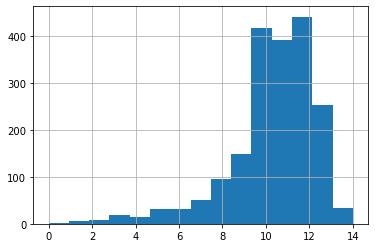

In [103]:
df.query('rating_numerator < 20').rating_numerator.hist(bins=15);

In [131]:
df.query('rating_numerator < 20').rating_numerator.mean()

10.533161953727506

In [132]:
df.query('rating_numerator >= 20').rating_numerator.count()

5

<span style="color: purple;">
There's more than 1 point difference in the score average by just removing 5 outliers.

<span style="color: blue;">
I would now like to look at the scores given for the different dog stages, to see if there's a preference from WeRateDogs for any of them.

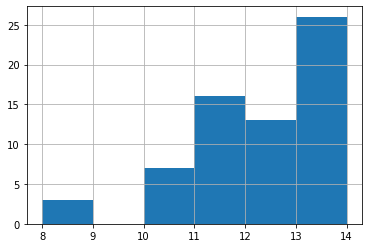

In [104]:
doggo = df.query('stage == "Doggo"')
doggo.rating_numerator.hist(bins=6);

In [105]:
doggo.rating_numerator.mean()

11.861538461538462

In [106]:
doggo.rating_numerator.median()

12.0

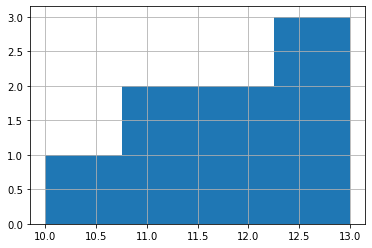

In [107]:
floofer = df.query('stage == "Floofer"')
floofer.rating_numerator.hist(bins=4);

In [108]:
floofer.rating_numerator.mean()

11.875

In [109]:
floofer.rating_numerator.median()

12.0

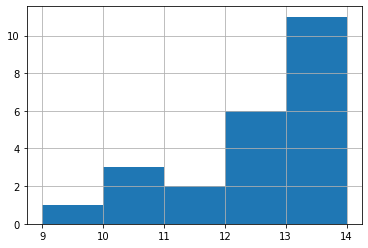

In [110]:
puppo = df.query('stage == "Puppo"')
puppo.rating_numerator.hist(bins=5);

In [111]:
puppo.rating_numerator.mean()

12.043478260869565

In [112]:
puppo.rating_numerator.median()

12.0

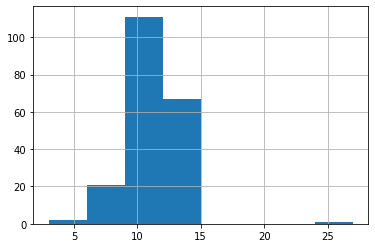

In [113]:
pupper = df.query('stage == "Pupper"')
pupper.rating_numerator.hist(bins=8);

In [114]:
pupper.rating_numerator.mean()

10.727722772277227

In [115]:
pupper.rating_numerator.median()

11.0

In [116]:
without_stage = df.query('stage != "Doggo" & stage != "Floofer" & stage != "Puppo" & stage != "Pupper"')
with_stage = df.query('stage == "Doggo" | stage == "Floofer" | stage == "Puppo" | stage == "Pupper"')

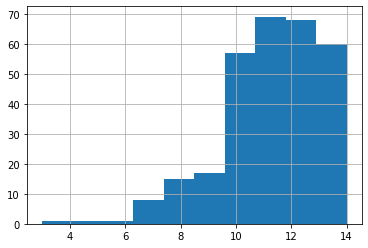

In [119]:
with_stage.query('rating_numerator < 20').rating_numerator.hist();

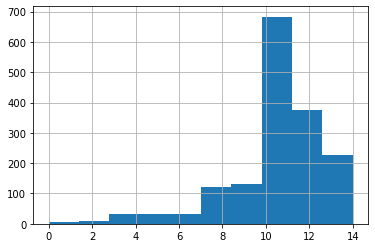

In [120]:
without_stage.query('rating_numerator < 20').rating_numerator.hist();

In [121]:
with_stage.rating_numerator.mean()

11.10738255033557

In [122]:
with_stage.rating_numerator.median()

11.0

In [123]:
without_stage.rating_numerator.mean()

11.8044794188862

In [124]:
without_stage.rating_numerator.median()

11.0

In [125]:
df.stage.value_counts()

Pupper     202
Doggo       65
Puppo       23
Floofer      8
Name: stage, dtype: int64

<span style="color: blue;">
Finally, I'd like to know if there's a correlation between the score given by WeRateDogs and the tweet favorite_count and retweet_count, to see if the judgement criteria from the tweet authors is similar to their public's.

To do this, I used this source:

https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns

In [126]:
df['rating_numerator'].corr(df['favorite_count'])

0.021928674543516255

In [127]:
df['retweet_count'].corr(df['favorite_count'])

0.9274044737167978

In [128]:
df['rating_numerator'].corr(df['retweet_count'])

0.023157276582473085

### Insights:
1. The histogram for the rating_numerator variable shows a left sckewed distribution, which indicates the scores given tend to be on the higher end of the range. The average and the median are close, at 11.7 and 11 respectively. We can also observe that the majority of dogs have a rating between 10 and 13, and the extreme values are used the least.

2. When looking at the 4 different stages separately, we see that doggo, floofer and puppo get a higher average and median scores than the rest of the dogs (more than 1 point in some cases if outliers aren't included). However, pupper seems to have a score similar to the dogs without stage. When separating into 2 categories (with and without stage), we see the values get very similar to each other, which may be explained by the fact that most dogs with a stage assigned are puppers (see visualization below), the ones with a lower score average.

3. The correlation between the score given by WeRateDogs and the favorite_count/retweet_count from their followers isn't as high as I was expecting (0.02 for both), which indicates that dogs with higher scores aren't necessarily the ones that the public likes the most.

### Visualization

<span style="color: blue;">
For this visualization I used the following sources:

https://re-thought.com/pandas-value_counts/

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

In [133]:
stage_counts = df.stage.value_counts().sort_index(ascending=True).tolist()

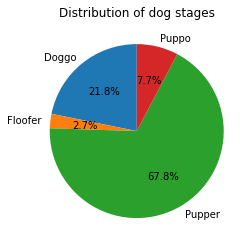

In [134]:
labels = 'Doggo', 'Floofer', 'Pupper', 'Puppo'

fig1, ax1 = plt.subplots()
ax1.pie(stage_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of dog stages")
plt.show()